In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [142]:
titanic=pd.read_csv('titanic_train.csv')

In [143]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [145]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


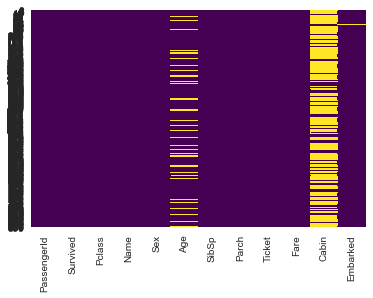

In [147]:
sns.heatmap(titanic.isnull(),yticklabels=True,cbar=False,cmap='viridis')

In [148]:
df=pd.DataFrame(data=titanic)

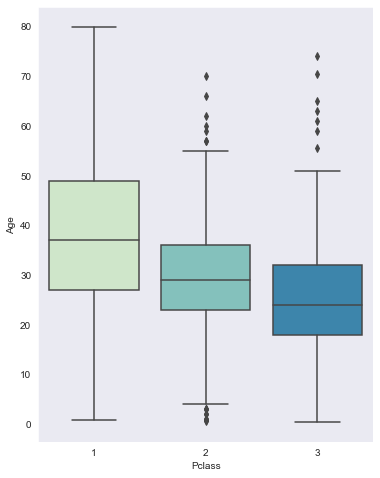

In [149]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Pclass',y='Age',data=df,palette='GnBu')

In [150]:
def age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 19
    else:
        return Age

In [151]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

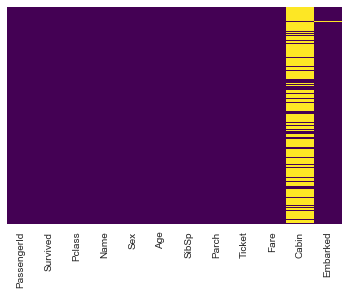

In [152]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

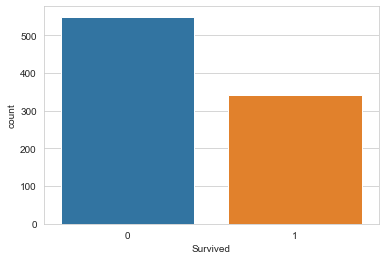

In [153]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

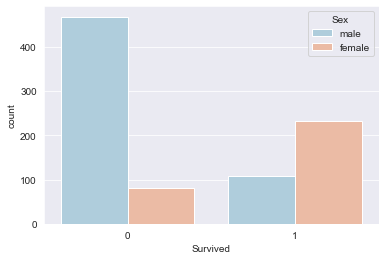

In [154]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

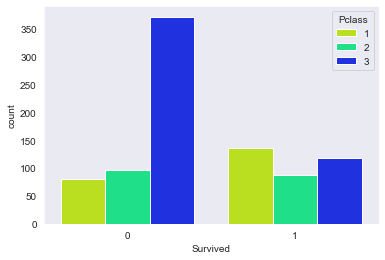

In [155]:
sns.set_style('dark')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='gist_rainbow')

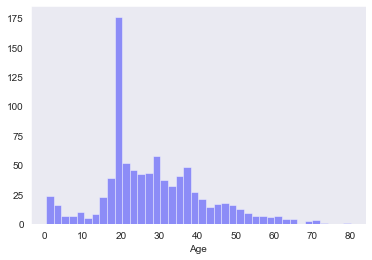

In [156]:
sns.distplot(df['Age'].dropna(),kde=False,color='Blue',bins=40)

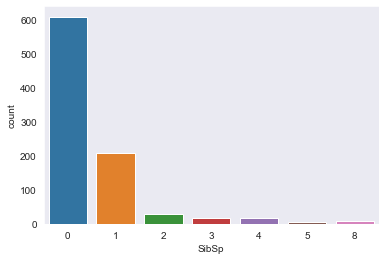

In [157]:
sns.countplot(x='SibSp',data=df)

In [158]:
df.drop('Cabin',axis=1,inplace=True)

In [159]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [160]:
df.dropna(inplace=True)

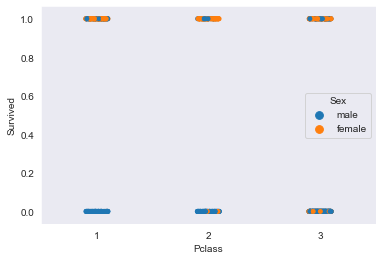

In [161]:
sns.stripplot(x='Pclass',y='Survived',hue='Sex',data=df)

In [162]:
#sns.swarmplot?

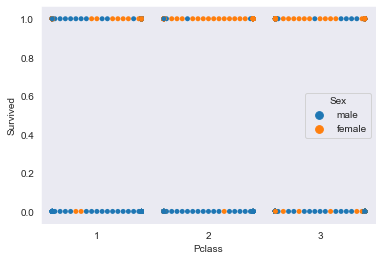

In [163]:
sns.swarmplot(x='Pclass',y='Survived',hue='Sex',data=df)

In [164]:
#sns.violinplot?

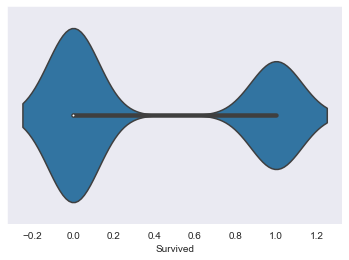

In [165]:
sns.violinplot(df['Survived'])

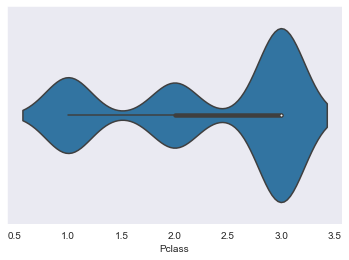

In [166]:
sns.violinplot(df['Pclass'])

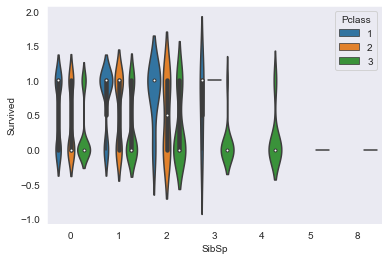

In [167]:
sns.violinplot(x='SibSp',y='Survived',hue='Pclass',data=df)

In [168]:
#plt.violinplot?

{'bodies': [<matplotlib.collections.PolyCollection at 0x167fd928b88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x167fd91cf08>,
 'cmins': <matplotlib.collections.LineCollection at 0x167fd92fbc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x167fd92fb08>}

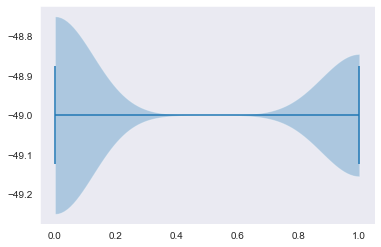

In [169]:
plt.violinplot(df['Survived'],positions=[1-50],vert=False,widths=0.5)

In [170]:
sns.catplot?

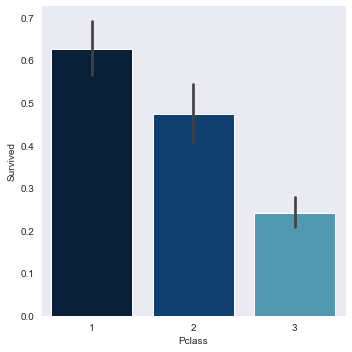

In [171]:
sns.catplot('Pclass','Survived',data=df,kind='bar',palette='ocean')

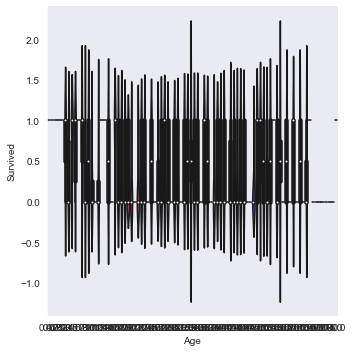

In [172]:
sns.catplot('Age','Survived',data=df,kind='violin',palette='seismic_r')

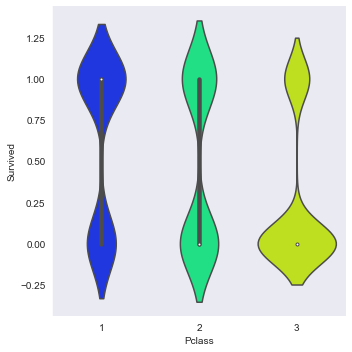

In [173]:
sns.catplot('Pclass','Survived',data=df,kind='violin',palette='gist_rainbow_r')

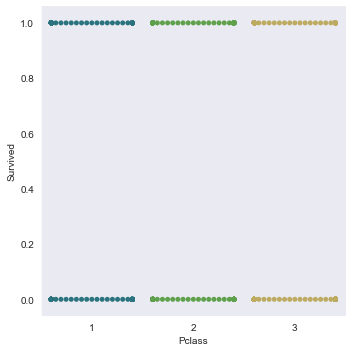

In [174]:
sns.catplot('Pclass','Survived',data=df,kind='swarm',palette='gist_earth')

In [175]:
#sns.jointplot?

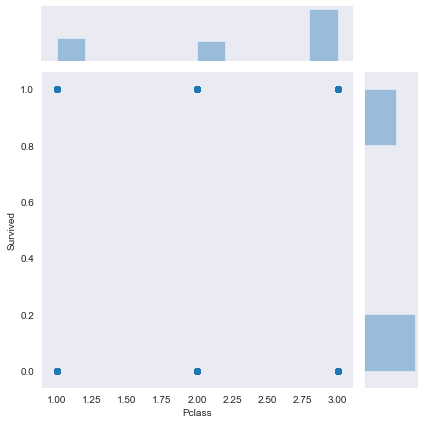

In [176]:
sns.jointplot('Pclass','Survived',data=df)

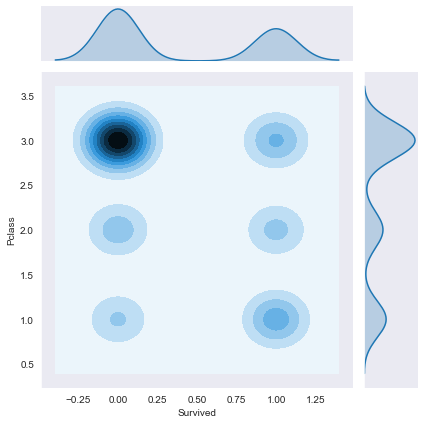

In [177]:
sns.jointplot('Survived','Pclass',data=df,kind='kde')

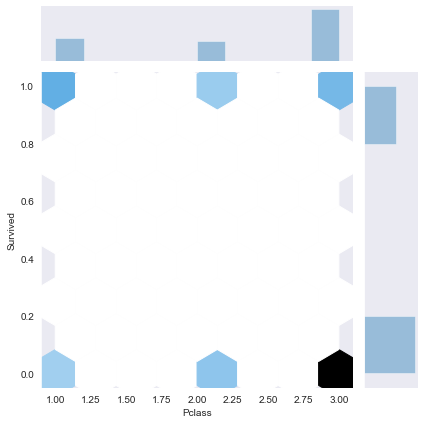

In [178]:
sns.jointplot('Pclass','Survived',data=df,kind='hex')

In [179]:
pc=df['Pclass']

In [180]:
pc.mean()

2.3115860517435323

In [181]:
np.percentile(pc,100)

3.0

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


In [183]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [184]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [185]:
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [186]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [187]:
df=pd.concat([df,sex,embark],axis=1)

In [188]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [189]:
x=df.drop('Survived',axis=1).head()
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [190]:
y=df['Survived'].head()
y

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [192]:
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),AdaBoostClassifier()]

In [193]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

0.5
[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

0.5
[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

0.0
[[0 1]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg     

In [194]:
from sklearn.externals import joblib

In [196]:
joblib.dump(model,'titanicfile.obj')

['titanicfile.obj']